In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from tqdm import tqdm

In [2]:
path_csv = '/home/abhigith/Desktop/steel_defect_dataset/train.csv'   #complete path to csv data of images 
path_image_train = '/home/abhigith/Desktop/steel_defect_dataset/train_images/'  #complete path to training images
data_csv = pd.read_csv(path_csv)

In [3]:
IMG_HEIGHT = 128
IMG_WIDTH = 128
IMG_CHANNELS = 3

In [4]:
data_enc = data_csv['EncodedPixels']
data_img_id = list(data_csv['ImageId'])

In [5]:
data_enc.shape

(7095,)

In [6]:
train_img = next(os.walk(path_image_train))[2]

In [7]:
x_train = np.zeros((len(train_img), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
y_train = np.zeros((len(train_img), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.uint8)
img_with_mask = np.zeros((len(train_img), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)

In [8]:
def rle2mask(rle, imgshape):
    #width & height of steel image
    width = imgshape[0]    
    height= imgshape[1]
    
    #flatttened empty array with size of input image
    mask= np.zeros( width*height ).astype(np.uint8)
    #convert all elements of encoded image pixels to int values
    array = np.asarray([int(x) for x in rle.split()])
    
    #splitting the encoded pixels
    #every odd index of encoded array is the start pixel &
    #every even index of encoded array is the length of the mask from start
    starts = array[0::2]
    lengths = array[1::2]
    
    #expanding the encoded pixel
    #current_position = 0
    for index, start in enumerate(starts):
        mask[int(start):int(start+lengths[index])] = 1
        #current_position += lengths[index]
    
    #numpy operations to bring the shape of mask suitable to image
    return np.flipud( np.rot90( mask.reshape(height,width,1), k=1 ) )


In [9]:
'''
#plotting variables
#fig=plt.figure(figsize=(10,100))
#columns = 100
#rows = 100

for i in tqdm(range(len(data_enc)), total=len(data_enc)):
    fn = data_csv['ImageId'][i]
    #image file
    img = cv2.imread( '/home/abhigith/Desktop/steel_defect_dataset/train_images/'+fn )
    #image BGR --> RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = np.resize(img, (IMG_HEIGHT,IMG_WIDTH,1))
    #generating mask from encoded pixels
    y_train[i] = rle2mask( data_enc[i], img.shape  )
    #covering the image with generated mask
    #img[mask==1,0] = 255
    #plt.imshow(img)
    
#plt.show()
'''

"\n#plotting variables\n#fig=plt.figure(figsize=(10,100))\n#columns = 100\n#rows = 100\n\nfor i in tqdm(range(len(data_enc)), total=len(data_enc)):\n    fn = data_csv['ImageId'][i]\n    #image file\n    img = cv2.imread( '/home/abhigith/Desktop/steel_defect_dataset/train_images/'+fn )\n    #image BGR --> RGB\n    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)\n    img = np.resize(img, (IMG_HEIGHT,IMG_WIDTH,1))\n    #generating mask from encoded pixels\n    y_train[i] = rle2mask( data_enc[i], img.shape  )\n    #covering the image with generated mask\n    #img[mask==1,0] = 255\n    #plt.imshow(img)\n    \n#plt.show()\n"

In [11]:
for i, img_id in tqdm(enumerate(train_img), total=len(train_img)):
    path = path_image_train + img_id
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = np.resize(img, (IMG_HEIGHT,IMG_WIDTH,IMG_CHANNELS))
    x_train[i] = img
    
    if img_id in data_img_id:
        idx = data_img_id.index(img_id)
        img = np.resize(img, (IMG_HEIGHT,IMG_WIDTH,1))
        y_train[i] = rle2mask(data_enc[idx], img.shape)
        

    

100%|██████████| 12568/12568 [01:50<00:00, 113.92it/s]


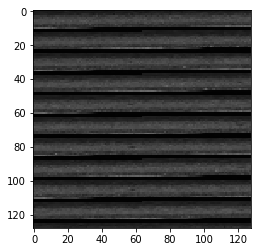

In [18]:
plt.imshow(x_train[123])